In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
np.__version__

'1.26.4'

In [3]:
pd.__version__

'2.2.2'

In [27]:
### ----------------------
### global variables
### ----------------------

RANDOM_STATE = 24
np.random.RandomState(seed = RANDOM_STATE)

TEST_SIZE = 0.2

# input and output directories
inpDir = '../../input'
outDir = '../output'

params = {
    'legend.fontsize': 'medium',
    'figure.figsize': (10, 6),
    'axes.labelsize': 'medium',
    'axes.titlesize':'large',
    'xtick.labelsize':'medium',
    'ytick.labelsize':'medium'
}

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')

Load Data

In [5]:
data_df = pd.read_csv("breast_cancer_mod.csv")
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0
3,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0
4,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   mean radius              569 non-null    int64
 1   mean texture             569 non-null    int64
 2   mean perimeter           569 non-null    int64
 3   mean area                569 non-null    int64
 4   mean smoothness          569 non-null    int64
 5   mean compactness         569 non-null    int64
 6   mean concavity           569 non-null    int64
 7   mean concave points      569 non-null    int64
 8   mean symmetry            569 non-null    int64
 9   mean fractal dimension   569 non-null    int64
 10  radius error             569 non-null    int64
 11  texture error            569 non-null    int64
 12  perimeter error          569 non-null    int64
 13  area error               569 non-null    int64
 14  smoothness error         569 non-null    int64
 15  compac

In [8]:
data_df["target"].value_counts()

,count
target,
1,357
0,212


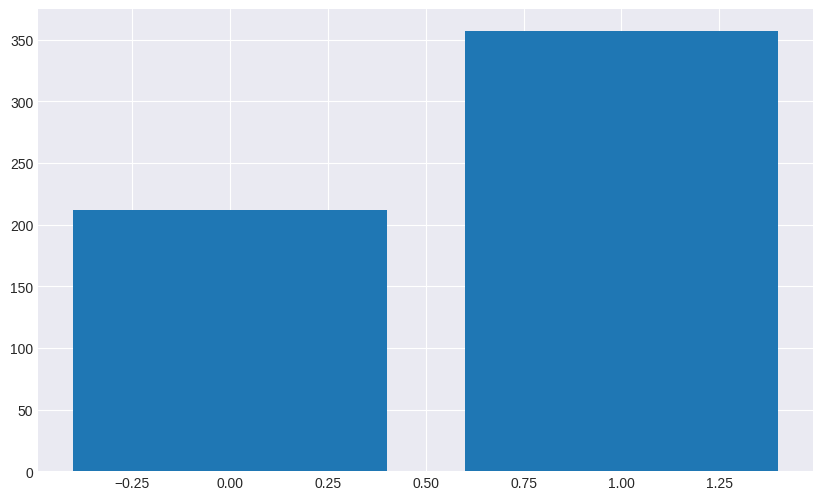

In [13]:
labels = ['malignant', 'benign']

fig, ax = plt.subplots()

ax.bar(data_df['target'].value_counts().index,
       data_df['target'].value_counts().values)
plt.show()

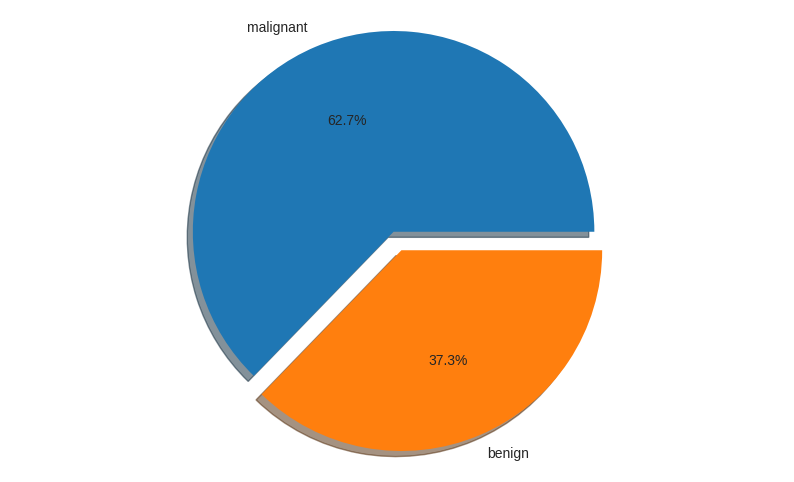

In [26]:
fig, ax = plt.subplots()

explode = (0.05, 0.05) # explode second slice only

ax.pie(data_df['target'].value_counts(),
       explode = explode,
       labels = labels,
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 0)
ax.axis('equal')
plt.show()

Split Data in Test Train

In [29]:
features_df = data_df.drop('target', axis = 1)
labels = data_df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE,
                                                    stratify = labels)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [31]:
X_train['total'] = X_train.astype(np.int16).sum(axis = 1)        # Here we are doing casting just to stay safe, cause here pandas is reading the dataset, Pandas decides intelligently the data type while reaing
X_train['target'] = y_train
X_train.sort_values('total', inplace = True)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,1,0,0,0,0,1,1,0,0,1,1,12,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0,1,1,13,0
1,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,13,0
7,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,0,0,0,1,15,0
6,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,15,0


In [32]:
X_train.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
334,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,30,1
488,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,30,1
556,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,30,1
550,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,30,1
345,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,30,1


In [33]:
X_test['total'] = X_test.astype(np.int16).sum(axis = 1)
X_test['target'] = y_test
X_test.sort_values('total', inplace = True)
X_test.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,total,target
3,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,1,14,0
4,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,14,0
12,0,0,0,1,1,0,1,1,0,1,1,1,1,1,1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,16,0
18,1,1,1,1,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,18,0
35,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,20,0


In [40]:
accuracy = {}

for b in range(X_train.shape[1]):                  # Looping over the columns
  X_train['pred'] = X_train['total'] >= b          # comparing with b to get output
  accuracy[b] = accuracy_score(y_true = X_train['target'], y_pred = X_train['pred'])

# b is a threshold and in our code cause our min total = 0 and max total = no. of columns, we are checking for all possible thresholds
# So here we are trying to find the threshold which gives the higher accuracy.

accuracy

{0: 0.6263736263736264,
 1: 0.6263736263736264,
 2: 0.6263736263736264,
 3: 0.6263736263736264,
 4: 0.6263736263736264,
 5: 0.6263736263736264,
 6: 0.6263736263736264,
 7: 0.6263736263736264,
 8: 0.6263736263736264,
 9: 0.6263736263736264,
 10: 0.6263736263736264,
 11: 0.6263736263736264,
 12: 0.6263736263736264,
 13: 0.6285714285714286,
 14: 0.6329670329670329,
 15: 0.6329670329670329,
 16: 0.6417582417582418,
 17: 0.6505494505494506,
 18: 0.6593406593406593,
 19: 0.6637362637362637,
 20: 0.6725274725274726,
 21: 0.6901098901098901,
 22: 0.7098901098901099,
 23: 0.734065934065934,
 24: 0.7692307692307693,
 25: 0.8021978021978022,
 26: 0.8307692307692308,
 27: 0.8505494505494505,
 28: 0.8483516483516483,
 29: 0.8241758241758241,
 30: 0.7472527472527473,
 31: 0.37362637362637363,
 32: 0.37362637362637363}

In [37]:
best_b = max(accuracy , key = accuracy.get)
best_b

27

In [39]:
X_test['pred'] = X_test['total'] >= best_b
accuracy_score(y_true = X_test['target'], y_pred = X_test['pred'])

0.868421052631579